# General Notebook

In [4]:
seed = 123
import os
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import random
import torch
random.seed(seed)     # python random generator
np.random.seed(seed)  # numpy random generator

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [5]:

# Change the name to create or load the data and models
path = os.getcwd()
folder_data = r'Data\data_mlsp_semi'
#-------------------------------
if torch.cuda.is_available():  
    device = "cuda:0" 
else:  
    device = "cpu"  
print(device)

cpu


## Data

In [6]:
#--------------------------------------------
# 0: Vaquita girada
# 1: Cow     2: Human 
# 3: Horse   4: Camel
# 5: Dog1    6: Dog2
idx  = 1 # Id image
p = 60 # porcentage of missing labels  options: [40, 60, 80, 100]
names = ['bull', 'cow', 'human', 'horse', 'camel', 'dog1', 'dog2']
name_image = names[idx]+str(p)
print(name_image)

cow60


In [7]:
#!  Pay attention to idx when we read the data 
x1 = plt.imread(os.path.join(path, folder_data, 'x{}.png'.format(idx+1)))
m, n = x1.shape
y_true = plt.imread(os.path.join(path, folder_data, 'y{}.png'.format(idx+1))).reshape(m*n, 1)
y1 =  np.load(os.path.join(path, folder_data, 'y_miss_{}.npy'.format(p)))[idx].reshape(m*n, 1)
x = torch.tensor(x1.reshape(m*n, 1), dtype=torch.float32)
y = torch.tensor(y1, dtype=torch.float32)
x = x.to(device)
y = y.to(device)

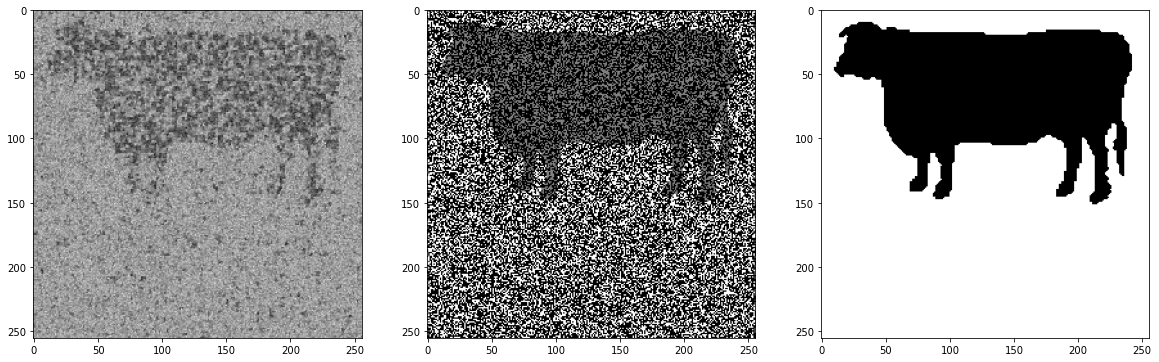

In [8]:
fig = plt.figure(figsize=(20, 30))  
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x1, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(y1.reshape(m,n), cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.imshow(y_true.reshape(m,n), cmap='gray')

## Functions and models

In [12]:
from models.SVRNN import SVRNN
from models.SVRNN_2 import SVRNN_2
from models.VSL import VSL
from models.TMM import TMM
from models.TMM_2 import TMM_2
from utils.training import final_model, run_model_seq, num_param, plot_loss_epoch

# Models

In [13]:
# General Parameters (we do not change the values of these parameters during the simulations)
x_dim = 1
y_dim = 1
# Parameters for the models
learning_rate = 0.01 # ! We can change this parameter but change the information in the sheet annotation
weight_decay_ = 1e-4
n_epochs = 100
clip = 10
# Parameters for printing and saving the results
#! Change this path for your own path to save the results 
# general_path  = os.getcwd() #! this option for save the results in the same folder of the code
general_path = r'C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models' 
# general_path = r"C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models"

print_every = 1
save_every = 2

## TMM

In [16]:
# Dimension of latent variables
z_dim = 1
h_dim = None # This value is not necessary for the TMM model
num_neurons = 28 #? == h_dim?

#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = ''# '_1' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
model = TMM(x_dim, z_dim, y_dim, num_neurons, device)

In [17]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


TMM has 5496 parameters to train
z_dim = 1, num_neurons = 28, h_dim = None
Actual path to save our models for tmm_cow60 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_cow60 


### Training

In [18]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_cow60\tmm


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -11234.513672 	 Loss Unlabeled: -44067.667969
Loss Labeled: -16061.859375 	 Loss Unlabeled: -49762.246094
Loss Labeled: -19374.722656 	 Loss Unlabeled: -53570.054688
Loss Labeled: -22348.751953 	 Loss Unlabeled: -57000.199219
Loss Labeled: -25034.619141 	 Loss Unlabeled: -60143.730469
Loss Labeled: -28090.425781 	 Loss Unlabeled: -63700.574219
Loss Labeled: -32114.472656 	 Loss Unlabeled: -68507.445312


### Initialization from a specific epoch 

In [40]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
plot_loss_epoch(model, path_save,data, epoch_init)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_cow40
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_cow40\tmm_state_100.pth
Initialization of the TMM model  at epoch 100
loss: -156838.828125 and epoch: 100


### Reconstruction image

In [41]:
# #* Reconstruction
y_ = model.sample(x,y)
y_pred_m = y_[np.where(y1 == -1)].detach().numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

cow40: TMM with  5363 parameters 
 after 100 has an error rate of 0.35847901763513257
 folder tmm_cow40


In [34]:
# #* Reconstruction
y_ = model.sample(x,y)
y_pred_m = y_[np.where(y1 == -1)].detach().numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

cow40: TMM_2 with  5363 parameters 
 after 100 has an error rate of 0.3166673042347271
 folder tmm_2_cow40


## SVRNN

In [24]:
# Dimension of latent variables
z_dim = 50
h_dim = 30 # This value is not necessary for the TMM model
num_neurons = h_dim #? == h_dim?
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = "_1"# '_1'# '_1' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
model = SVRNN_2(x_dim, z_dim, h_dim, y_dim, num_neurons, device)

### Execution

In [25]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


SVRNN_2 has 20664 parameters to train
z_dim = 50, num_neurons = 30, h_dim = 30
Actual path to save our models for svrnn_2_cow40_1 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1 


In [20]:
# #* Training
# loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

In [26]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 60
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device)
plot_loss_epoch(model, path_save,data, epoch_init)
# # loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1\svrnn_2_state_60.pth
Initialization of the SVRNN_2 model  at epoch 60
loss: -149778.640625 and epoch: 60


In [27]:
# #* Reconstruction
y_ = model.sample(x,y)
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

cow40: SVRNN_2 with  20664 parameters 
 after 60 has an error rate of 0.29547454190734856
 folder svrnn_2_cow40_1


In [22]:
# #* Reconstruction
y_ = model.sample(x,y)
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

cow40: SVRNN with  5368 parameters 
 after 50 has an error rate of 0.4018208943804751
 folder svrnn_cow40


In [11]:
# #* Reconstruction
y_ = model.sample(x,y)
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

cow40: SVRNN with  5368 parameters 
 after 100 has an error rate of 0.11709574997130945
 folder svrnn_cow40


In [16]:
# #* Reconstruction
y_ = model.sample(x,y)
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

cow40: SVRNN_2 with  5368 parameters 
 after 100 has an error rate of 0.07478673348379938
 folder svrnn_2_cow40


In [ ]:
# y_ = model.sample(x,y)
# y_pred = y_[np.where(y1 == -1)].detach().numpy()
# y_label = y_list[idx].reshape(m*n, 1)
# y_true = y_label[np.where(y1 == -1)]
# 1-accuracy_score(y_true, y_pred)


# Other Code
Creation missing labels and plots

In [ ]:
#-------------------------------
# Change the name to create or load the data and models

folder_data = r'C:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\Data\data_mlsp_semi'


x_list = []
y_list = []
# y_list_40 = []
# y_list_60 = []
# y_list_80 = []
# y_list_100 = []


for img in sorted(os.listdir(folder_data)):
    if img.startswith('x'):
        x_list.append(plt.imread(os.path.join(folder_data, img)))
    if img.startswith('y') and not img.endswith('npy'):
        y = plt.imread(os.path.join(folder_data, img))
        y_list.append(y)
        # Only if we want to create the missing labels for different probabilities
#         for p in probabilities:
#             if p == 0.4:
#                 y_list_40.append(create_missing_labels(y, p))
#             elif p == 0.6:
#                 y_list_60.append(create_missing_labels(y, p))
#             elif p == 0.8:
#                 y_list_80.append(create_missing_labels(y, p))
#             elif p == 1:
#                 y_list_100.append(create_missing_labels(y, p))
        
# np.save(os.path.join(general_path, folder_data, 'y_miss_40.npy'), y_list_40)
# np.save(os.path.join(general_path, folder_data, 'y_miss_60.npy'), y_list_60)
# np.save(os.path.join(general_path, folder_data, 'y_miss_80.npy'), y_list_80)
# np.save(os.path.join(general_path, folder_data, 'y_miss_100.npy'), y_list_100)

# Load the created data 
y_list_40 = np.load(os.path.join(general_path, folder_data, 'y_miss_40.npy'))
y_list_60 = np.load(os.path.join(general_path, folder_data, 'y_miss_60.npy'))
y_list_80 = np.load(os.path.join(general_path, folder_data, 'y_miss_80.npy'))
y_list_100 = np.load(os.path.join(general_path, folder_data, 'y_miss_100.npy'))

In [ ]:

fig = plt.figure(figsize=(20, 30))  
rows = len(x_list)
columns = 6
m, n = x_list[0].shape


for i, (x,y, y1,y2,y3, y4) in enumerate(zip(x_list, y_list, y_list_40, y_list_60, y_list_80, y_list_100)):
    print(x.shape)
    fig.add_subplot(rows, columns, columns*i+1)
    x[m-1, n-1] = -1
    plt.imshow(x, cmap='gray')
    plt.title('Image  idex {}'.format(i))
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+2)
    y[m-1, n-1] = -1
    plt.imshow(y, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+3)
    plt.imshow(y1, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+4)
    plt.imshow(y2, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+5)
    plt.imshow(y3, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+6)
    plt.imshow(y4, cmap='gray')



In [ ]:
print('{} has {} parameters to train'.format(model.__class__.__name__ ,num_param(model)) )

In [ ]:
y_ = model.sample(x,y)
image_complete = y_.clone().detach().numpy().reshape(m,n)
image_complete[m-1,n-1] = -1
image_labeled = y_list[idx].copy()
image_labeled[m-1,n-1] = -1
plt.imshow(x_list[idx])
plt.show()
plt.imshow(image_complete)
plt.show()
plt.imshow(image_labeled)
plt.show()
plt.imshow(y_list_80[idx])
plt.show()


unique, counts = np.unique(y_true, return_counts=True)
print(unique, counts)
unique, counts = np.unique(y_pred, return_counts=True)
print(unique, counts)